# San Francisco Food Safety Analysis
Here I investigate San Francisco restaurant food safety scores. The data comes from the SF Departement of public health. 

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import sys

In [2]:
#First download and cache datafor analysis

import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading!...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Finished!')
    else:
        import time
        download_time = time.ctime(file_path.stat().st_ctime)
        print('Using cached version downloaded at:', download_time)
    return file_path

### First download and cache the data using function above:

In [3]:


data_url = 'http://www.ds100.org/sp18/assets/datasets/hw2-SFBusinesses.zip'
file_name = 'data.zip'
data_dir = '.'


dest_path = '/home/evan/projects/Food Safety/data.zip'
print('Saved at {}'.format(dest_path))

Saved at /home/evan/projects/Food Safety/data.zip


### Now load the data and understand format, etc.

In [4]:
my_zip = zipfile.ZipFile(dest_path, 'r')
list_names = my_zip.namelist()

In [5]:
# Some commands to check data attributes
my_zip.infolist()
print(my_zip.infolist())
print()
print([f.filename for f in my_zip.filelist])

[<ZipInfo filename='violations.csv' compress_type=deflate external_attr=0x20 file_size=3726206 compress_size=286253>, <ZipInfo filename='businesses.csv' compress_type=deflate external_attr=0x20 file_size=660231 compress_size=178549>, <ZipInfo filename='inspections.csv' compress_type=deflate external_attr=0x20 file_size=466106 compress_size=83198>, <ZipInfo filename='legend.csv' compress_type=deflate external_attr=0x20 file_size=120 compress_size=104>]

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']


In [6]:
# Check first few lines of legend.csv, use to understand scores
file_to_open = 'legend.csv'
with my_zip.open(file_to_open) as f:
    for i in range(5):
        print(f.readline().rstrip().decode())

"Minimum_Score","Maximum_Score","Description"
0,70,"Poor"
71,85,"Needs Improvement"
86,90,"Adequate"
91,100,"Good"


In [7]:
# Define HEAD function to display first 5 lines of each file in folder
def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    #check this
    #print("Below are the files in this folder:")
    #for file in my_zip.namelist():
    #   print(file)
    if filename:
        print()
        print("Here's the first {} lines of {}:".format(lines, filename))
        with my_zip.open(filename) as file:
            for i in range(lines):
                print(file.readline().rstrip().decode())

In [8]:
# Extract zip file to desired directory (in this case in 'data')
data_dir = Path('/home/evan/projects/Food Safety/data')
my_zip.extractall('/home/evan/projects/Food Safety/data')

for filename in my_zip.namelist():
    head(filename, 5)


Here's the first 5 lines of violations.csv:
"business_id","date","description"
19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"
19,"20171211","Unapproved or unmaintained equipment or utensils"
19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"
19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"

Here's the first 5 lines of businesses.csv:
"business_id","name","address","city","state","postal_code","latitude","longitude","phone_number"
19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"
24,"OMNI S.F. HOTEL - 2ND FLOOR PANTRY","500 CALIFORNIA ST, 2ND  FLOOR","San Francisco","CA","94104","37.792888","-122.403135","+14156779494"
31,"NORMAN'S ICE CREAM AND FREEZES","2801 LEAVENWORTH ST ","San Francisco","CA","94133","37.807155","-122.419004",""
45,"CHARLIE'S DELI CAFE",

#### *Some observations:*

-All files are CSV formated
-They all contain headers
-Strings appear to be quoted, so watch types
-overall data has good format in most cases

In [9]:
# Now load each file into pandas data frame format
dsDir = Path('data')
bus = pd.read_csv(dsDir/'businesses.csv', encoding='ISO-8859-1')
ins = pd.read_csv(dsDir/'inspections.csv', encoding='ISO-8859-1')
vio = pd.read_csv(dsDir/'violations.csv', encoding='ISO-8859-1')


In [10]:
# Some sanity checks and basic information on each data frame
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('Businesses:')
display(bus_summary)
print('Inspections:')
display(ins_summary)
print('Violations:')
display(vio_summary)

Businesses:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


Inspections:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


Violations:


,business_id
min,19.0
50%,62060.0
max,94231.0


In [11]:
# Check the head of each data frame to see structure and data
bus.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


In [12]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


In [13]:
vio.head(5)

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


#### *Some general observations on the data frames* 

At first glance, it does appear we are missing some values with phone numbers, zip codes, and coordinates. These are pretty useful for, say, cross referencing with other data sources such as street addresses, etc. Furthermore, in the the `ins` and `vio` tables, we see the date is in an odd format (appears to be something like 'yyyymmdd' all in one string). This is a fairly inconvenient format and will need to be changed. We also notice some zipcodes are either missing, don't make sense for being in SF, or are in an improper format; some are 'CA' for example. 

If we really want to understand this data further, scores in particular, we should try and understand how the SF Dept' of Health scoring works as a number of e.g. 94 gives us only a general summary. Also, the description of violations seems to be based on a select number of categories.  This means the violation type may not truly describe the actual violations too acurately as it falls into a pre-set category. Also, it is hard to tell if an inspector can select more
than one violation per visit (e.g. do they put lack of cleanliness or a missing certificate if both these violations occur?). This may induce bias towards a certain type.

# Diving into Business Data

let's look into businesses.csv and understand the restaurants we have in our data set. 

### Let's check the Business ID category

In [14]:
#check if we have more than 1 entry (aka non-unique) for business_id entries
for count in bus["business_id"].value_counts():
    if count > 1:
        print(bus["business_id"])

Importantly, we see business ID is unique. That means it makes a nice primary key.

### Let's look at overall granularity

In [15]:
#check for duplicates
bus["name"].value_counts()

STARBUCKS COFFEE                                          73
PEET'S COFFEE & TEA                                       25
MCDONALDS                                                 13
LEE'S DELI                                                10
JAMBA JUICE                                               10
SPECIALTY'S CAFE & BAKERY                                  9
AT&T PARK - FOOD CART                                      9
PROPER FOOD                                                9
MIXT GREENS                                                8
WALGREENS                                                  8
BLUE BOTTLE COFFEE                                         8
NUCHA                                                      8
PHILZ COFFEE                                               7
WHOLE FOODS MARKET                                         7
LA BOULANGERIE DE SAN FRANCISCO                            7
AT&T PARK - DRAFT BEER CART                                6
BON APPETIT @ TWITTER   

In [16]:
#check if we have copies of businesses
bus["business_id"].value_counts() > 1

2047     False
71088    False
5528     False
89497    False
16513    False
81309    False
75166    False
83362    False
3491     False
81317    False
5544     False
93615    False
89521    False
29304    False
62900    False
91574    False
93623    False
1466     False
69051    False
81341    False
7617     False
83394    False
81349    False
89545    False
82196    False
16884    False
1426     False
87440    False
71008    False
17762    False
         ...  
90833    False
84692    False
78555    False
39513    False
76464    False
67448    False
3611     False
2724     False
85679    False
4703     False
62051    False
68196    False
93546    False
62067    False
2676     False
75903    False
86647    False
76408    False
68220    False
82557    False
88702    False
2692     False
645      False
86663    False
88718    False
81342    False
21143    False
64154    False
2716     False
83969    False
Name: business_id, dtype: bool

In [17]:
# Do we have null values?
bus.isnull().values.any()


True

#### General observations on granularity:

We seem to have fairly fine data in most places. Of course, there are some issues. Though there are no business ID copies, we notice some names are the same. This makes sense as chains exist, such as Starbucks which over 70 appearances! Thus, this category does have some coarse areas that must be cross referenced with address/location. One other thing that we notice is there are missing values for some datapoints, such as zip code, coordinates, phone number, etc. This is not terrible, but does mean we may need to decide on how to granularize our data to make it accurate. 


### Looking at zip code data

In [18]:
type(bus['postal_code'][20])

str

In [19]:
bus["postal_code"][20]

'94108'

Postal code, though ostensibly a number, is not quantitative--it is  qualitative. We say this as they are categorical; it tells us what area you lie in within SF (and the united states). The number itself, though, is basically meaningless (though some things e.g. starting with a 9 does seem to mean the zip code falls somewhere near the Bay Area).

As we can see from the above line, postal code is encoded as a string.


In [20]:
# Generate a data frame to examine counts of zip codes and
# see where restaurants lie and if there are anomalies.
# We also address missing values by changing entry to 'MISSING'
new_bus = bus.fillna(value='MISSING')
new_bus['count'] = 0

zip_counts = new_bus[['postal_code', 'count']].groupby('postal_code').agg(len)
zip_counts

,count
postal_code,
00000,2
64110,1
92672,1
94013,2
94014,2
94066,1
94080,1
941,1
94101,2


As we can see, there's some bad data. There are lots of missing zip codes. Also, there are some clear typos and extended zip codes. We need to clean it a little:

In [21]:
# Clean long zip codes
bus['zip_code'] = bus['postal_code'].str[:5]
bus['zip_code'].value_counts(dropna=False)

94110    597
94103    553
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
94112    195
94124    191
94123    173
94121    160
94104    139
94132    133
94116     99
94134     77
94127     71
94131     49
94158     32
94130      7
94143      5
94188      4
94014      2
CA         2
94013      2
94129      2
00000      2
94101      2
94545      1
92672      1
94544      1
941        1
94066      1
94602      1
94080      1
94621      1
Ca         1
94120      1
95105      1
64110      1
Name: zip_code, dtype: int64

Now let's try and understand what's going on with all these missing zip codes. Is there a fundamental flaw? Human error? 

Here's the data frame of missing values:



In [22]:
new_bus[new_bus["postal_code"] == "MISSING"]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,MISSING,37.7386,-122.469,+14152792647,0
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,MISSING,37.7391,-122.485,MISSING,0
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,MISSING,37.7856,-122.43,+14155190341,0
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,MISSING,37.7599,-122.421,+14153109293,0
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,MISSING,37.7526,-122.416,+14155507510,0
1762,10372,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,MISSING,37.7391,-122.416,+14152062142,0
1763,10373,EL TONAYENSE #1,1717 HARRISON ST,San Francisco,CA,MISSING,37.7694,-122.413,+14155596127,0
1764,10376,GOOD FRIKIN CHICKEN,10 29TH ST,San Francisco,CA,MISSING,37.7444,-122.421,+14158601365,0
1766,10406,SUNSET YOUTH SERVICES,3918 JUDAH ST,San Francisco,CA,MISSING,37.7606,-122.504,MISSING,0
1778,10964,ANGEL'S HOT DOGS,CORNER OF ALAMEDA AND HENRY ADAMS,San Francisco,CA,MISSING,MISSING,MISSING,MISSING,0


I first look at random missing zip code entries and Google if these places do in fact exist. Most do, and most are in SF. There are some patterns that do emmerge:

In [23]:
# Off the grid has some amazing food. Also, 
# food trucks are pretty big here. Can a truck have a zipcode?
new_bus[new_bus["address"] == "OFF THE GRID"]


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
4837,83636,SAM'S CHOWDER MOBILE #4,OFF THE GRID,San Francisco,CA,MISSING,MISSING,MISSING,+14157121766,0
4966,84740,JUDIE'S TACOS LOCOS,OFF THE GRID,San Francisco,CA,MISSING,MISSING,MISSING,+14156232935,0


In [24]:
new_bus[new_bus['name'].str.contains('TRUCK')]


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
1237,5291,EL TONAYENSE CATERING TRUCK #2,3101 19TH ST,San Francisco,CA,94110,37.7606,-122.413,+14156151351,0
1781,11034,RITA'S CATERING TRUCK,100 ALEMANY BLVD,San Francisco,CA,94112,37.7369,-122.409,+14154550522,0
3142,67875,THE CHAIRMAN TRUCK,OFF THE GRID,San Francisco,CA,00000,37.7771,-122.42,+14158461711,0
3257,68649,TRES TRUCK,130 TOWNSEND ST,San Francisco,CA,94107,37.7801,-122.391,+14159741978,0
3667,72132,LITTLE RED RIDING TRUCK,SOMA STREET FOOD PARK,San Francisco,CA,MISSING,MISSING,MISSING,MISSING,0
3685,73940,ADAM'S GRUB TRUCK,OFF THE GRID,San Francisco,CA,MISSING,MISSING,MISSING,MISSING,0
3846,75649,CHAIRMAN TRUCK,428 11TH ST,San Francisco,CA,94103,MISSING,MISSING,+14158138800,0
3994,77205,LOBSTA TRUCK,OFF THE GRID,San Francisco,CA,MISSING,MISSING,MISSING,+14157825878,0
4139,78481,PANCHITA'S PUPUSAS TRUCK,428 11TH ST,San Francisco,CA,94103,MISSING,MISSING,+14152997005,0
4421,80679,MORA TACO TRUCK,1116 POTRERO AVE,San Francisco,CA,94124,MISSING,MISSING,+14157566019,0


In [25]:
# And what about catering services?

In [26]:
new_bus[new_bus['name'].str.contains('CATERING')]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
81,400,COW HOLLOW CATERING,3301 LYON ST,San Francisco,CA,94123,37.8014,-122.448,MISSING,0
180,826,ANGELINA'S DELI-CAFE & CATERING,6000 CALIFORNIA ST,San Francisco,CA,94121,37.784,-122.482,+14152217801,0
832,3414,TASTE CATERING,3450 03RD ST 4D,San Francisco,CA,94124,37.7456,-122.387,+14155506464,0
1224,5232,GLOBAL GOURMET CATERING,1030 ILLINOIS ST,San Francisco,CA,94107,37.7589,-122.387,+14157010001,0
1225,5243,CHRISTOPHER'S CATERING,1643 JERROLD AVE,San Francisco,CA,94124,37.7392,-122.39,+14156413850,0
1226,5252,DAY DARMET CATERING,1068 REVERE AVE,San Francisco,CA,94124,37.7261,-122.38,+14158219951,0
1227,5254,BETTY ZLATCHIN CATERING,1177 INDIANA ST,San Francisco,CA,94107,37.7555,-122.391,+14156418599,0
1229,5258,IBERIA CATERING,2850 ALEMANY BLVD,San Francisco,CA,94112,37.7127,-122.451,MISSING,0
1230,5267,KNIGHTS CATERING,255 MENDELL STREET,San Francisco,CA,94124,37.7419,-122.384,+14159203663,0
1235,5281,EVA'S CATERING,PIER 45,San Francisco,CA,94122,MISSING,MISSING,+14158281026,0


In [27]:
# SF does have some odd zip codes too. Boats and piers are weird.
new_bus[new_bus["postal_code"] == "941"]


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.8079,-122.442,+14153462628,0


#### Some things we notice on zip codes:

Looking at all the missing zip codes, we see a few common patterns. Firstly, we notice that some place's have VARIOUS LOCATIONS. Looking into these places, we see they're catering companies. Or, even better, a Google search of the company name may reveal they're food trucks. This makes sense if you've ever been to Off The Grid or First Fridays. There's lots! In fact, some addresses have this name! Looking into this further, we do see that many businesses with "TRUCK" in their name are missing a zip code. Same with catering and other non-permanent
food places etc. 

I also cross referenced the zip codes with other one's in SF. Some were 
missing, though looking into them, it made sense. Places such as City Hall and the Embarcadero Center had unique ones. Some locations could fall here (or none at all). Some locations with addresses that appeared with MISSING seem to just not include their zip. For example, my research showed that many MISSING one's appeared in 94110, which 
has the most business on yelp in SF. This prominence of values to me suggests that human error or laziness may account for these missing values. 

In [28]:
# Some more zip code oddities that should get fixed

def zip_business_finder(zip):
    return new_bus[new_bus["postal_code"] == str(zip)]
zip_business_finder(94545)
zip_business_finder(94602)

# 94545 - though in Hayward, CA, we see J&J is a vending service
# that provides to many offices in SF. That's why they're on Yelp here.

# 94602 - this appears to be an error. There is an Orbit Room in SF with zip
# 94102. However, there's also a historic jazz club in Oakland with the 
# same name and zip code 94602.



,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,count
5060,85459,ORBIT ROOM,1900 MARKET ST,San Francisco,CA,94602,MISSING,MISSING,+14153705584,0


### Latitude and Longitude Analysis

In [29]:
# How many businesses are missing Lat and Lon?
# assume that missing latitude => missing longitude too
missing_lats = new_bus[new_bus["latitude"] == "MISSING"]
missing_lats = bus[(bus['longitude'].isnull())&(bus['latitude'].isnull())]
len(missing_lats)

3136

In [30]:
missing_latlongs = len(missing_lats)


To continue our analysis of SF restaurants, we define a list of valid zipcodes we want to look at:

In [31]:
validZip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

We'll find the number of businesses in each zip code without longitude values

In [32]:
#scratch work
has_coords = bus[(bus['longitude'].isnull() == False) & (bus['latitude'].isnull() == False)]
has_coords = has_coords[has_coords['postal_code'].isin(validZip)]


In [33]:
has_zipcode_count = has_coords['postal_code'].value_counts()
has_zipcode_count

94110    302
94103    268
94133    267
94102    241
94109    209
94107    185
94115    148
94111    148
94122    141
94118    132
94108    130
94112    118
94117    118
94114    112
94123    105
94105    105
94121    100
94124     73
94132     62
94104     60
94116     57
94134     41
94127     41
94131     33
Name: postal_code, dtype: int64

In [34]:
# Filter the bus dataframe to contain only the validZip
bus_sf = bus[(bus['postal_code'].isnull()) == False]


# Create a new dataframe of counts of the null and proportion of null values
bus_sf_latlong = pd.DataFrame(columns = ["zip_code", "null_lon", "not_null_lon"])

#add zip codes we care about to df
bus_sf_latlong["zip_code"] =  validZip

#add number of not_null_lons to df
has_coords = bus[(bus['longitude'].isnull() == False) & (bus['latitude'].isnull() == False)]
has_coords = has_coords[has_coords['postal_code'].isin(validZip)]
has_zipcode_count = has_coords['postal_code'].value_counts()
bus_sf_latlong["not_null_lon"] = has_zipcode_count.values

#find number w/out coords in zipcode
no_coords = bus[(bus['longitude'].isnull() == True) & (bus['latitude'].isnull() == True)]
no_coords = no_coords[no_coords['postal_code'].isin(validZip)]
no_coords = no_coords['postal_code'].value_counts()
bus_sf_latlong["null_lon"] = no_coords.values
bus_sf_latlong

,zip_code,null_lon,not_null_lon
0,94102,294,302
1,94103,284,268
2,94104,275,267
3,94105,221,241
4,94107,171,209
5,94108,159,185
6,94109,132,148
7,94110,129,148
8,94111,127,141
9,94112,118,132


## Summary of the business data

* Business id is unique across records and so we may be able to use it as a key in joining tables. 
* We also found that there are some bad values in zip code. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we may want to take the time to look up the restaurant address online and fix these errors.   
* We also found that there are many missing values in latitude and longitude. These may have implications on map making and geographic patterns if the missingness is related to location or restaurant score.

# Investigation of Inspection Data

*Now we look at `ins` data frame on inspection results

In [35]:
# Some sanity checks showing business ID is valid to join tables

# The number of rows in ins
rows_in_table = ins.shape[0]

# The number of unique IDs in ins.
unique_ins_ids = len(ins['business_id'].unique())

### Let's examine the 'type variable':

In [36]:
ins["type"].unique()


array(['routine', 'complaint'], dtype=object)

In [37]:
ins['type'].value_counts()

routine      14221
complaint        1
Name: type, dtype: int64

Obeservations:

First off, we see that type takes on two string values, 'routine' and 'complaint.' We see that there were 14,221 total routine inspections, and one complaint-based one! This is not so good, as it means this category is basically meaningless in gaining insight. There is no variation in the data except for one entry. Thus, it cannot help us in any analysis. For example, we cannot test if having a complaint food inspection affected rating because there is only 1 data point!


### Date formating changes

As we noted before, date has some odd attributes, namely that it is a string. We want to reformat it such that it's more useful to us. We'll add a new_date column in datetime format, and then add a year column

In [38]:
# Reformat date to datetime object in new_date col
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')

# Create year column
ins['year']     = ins['new_date'].dt.year

ins.head()

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


In [39]:
# What range do we cover?
ins['year'].unique()

array([2016, 2017, 2015, 2018])

In [40]:
# How many inspections are there per year?
ins['year'].value_counts()

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64

We see the range of years in this dataset is from 2015 to 2018. At a general glance, we can see there were far less inspections in 2015 than 2016 and 2017, which were about the same. 2018 only has 300, obviously as we are only a month in. 


In [41]:
### Explore 2016 Inspections

Here we look at 2016 inspection scores. Check out the [inspection guidelines](https://www.sfdph.org/dph/eh/Food/Inspections.asp).

What does the distribution of 2016 scores look like?

In [42]:
# Just 2016 data
ins2016 = ins[ins['year'] == 2016]

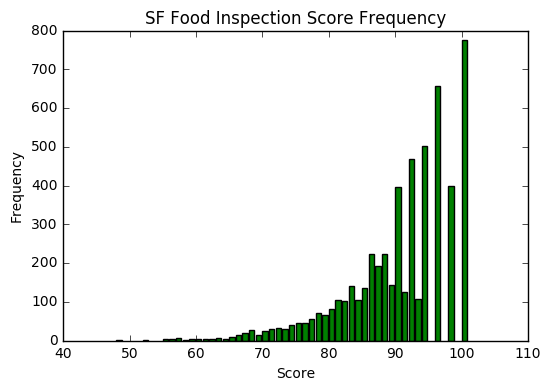

In [43]:
# Create bar chart examining score distribution

scoreCts = ins2016['score'].value_counts()

value_counts = ins2016['score'].value_counts().to_frame()
value_counts.sort_index(ascending =False)
plot = plt.subplot()
plot.set_title('SF Food Inspection Score Frequency')
plot.set_ylabel('Frequency')
plot.set_xlabel('Score')
plot.bar(value_counts.index, value_counts['score'], color='green')

plt.show()

*Some notes about our distribution:*

We notice that there are no scores of 95, 97 and 99. It seems the score begins to skip by two after 94. This
may happen due to criteria or convention, but that needs to be investigated by checking how inspections are done. 

We also notice a clear distribuition that, with some help from pandas, reveals a mean score of 90.31 with tail towards lower 
scores. This is confirmed by the max being 100 and the min being 48.

in terms of anamolous values, it does not seem that there are any, per se. It depends on how you want to treat them, as the 
frequency of inspections with score below 60 is quite low. Some restaurants are a little sketchy after all!

We do notice there are no scores of 0, but this is likely a product of the test criteria itself. Again, looking at the criteria
and breaking it down could provide some meaningful insight into score meanings. For example, a score of 48 must be pretty 
attrocious. Recall that above 71 is the lowest defined category of needing improvement!


How many inspections did each business have in 2016? We create a dictionary of number of inspections to count of businesses with that many inspections

In [44]:
# How many inspections happened per year?
unique_businesses16 = len(ins2016['business_id'].unique())
total_inspections16 = len(ins2016.index)
num_extra_checks = total_inspections16 - unique_businesses16

#Create DF with business ID and number of times inspected in 2016
visit_count_in16 = ins2016[['business_id', 'year']].groupby('business_id', as_index=False).count()
visit_count_in16 = visit_count_in16.rename(columns={'year':'number_visits'})
visit_count_in16.sort_values(by = 'number_visits', ascending=False)

#Create DF showing number of businesses with x ammount of inspections
num_inspections_count = visit_count_in16.groupby('number_visits', as_index=True).count()
num_inspections_count = num_inspections_count.rename(columns={'business_id':'number_businesses'})

#Create dictionary mapping the number of inspections to the number of business ids with that many inspections

dict_helper = num_inspections_count.transpose()

numIns2numIDs = dict_helper.to_dict('records')[0]



In [45]:
numIns2numIDs

{1: 3033, 2: 1076, 3: 86}

### Restaurants with multiple inspections

We notice some restaurants at 3 inspections. For our purposes, let's just look at those that had 2 and see how they fared.

What's the relationship between the first and second inspection? Do they improve?

We'll create a dataframe called scores_pairs_by_business that is indexed by business ID. It will contain the pair of their inspection scores in chronological order.

In [46]:
# Create df of ID and scores, then condense to group scores by ID. 
id_and_score = ins2016[['business_id', 'score']]
id_and_score.groupby('business_id')['score'].apply(list)
score_pairs = id_and_score.groupby('business_id')['score'].apply(list).to_frame()
score_pairs = score_pairs[score_pairs['score'].map(len) == 2]
score_pairs = score_pairs.rename(columns = {'score' : 'score_pair'})
scores_pairs_by_business = score_pairs


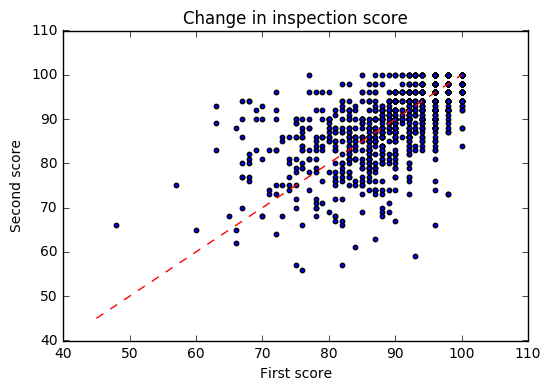

In [47]:
# Let's create a scatter plot of score changes. Red dotted line shows 
# improvement if above line.

x, y = zip(*scores_pairs_by_business.score_pair) #@source https://stackoverflow.com/questions/21519203/plotting-a-list-of-x-y-coordinates-in-python-matplotlib
splot = plt.subplot()
splot.set_title('Change in inspection score')
splot.set_ylabel('Second score')
splot.set_xlabel('First score')
splot.scatter(x, y, s=10)

#create ref line
x = [45, 100]
y = [45, 100]
splot.plot(x, y, 'r--')
plt.show()

In [48]:
# We can also look at this by analyzing the difference between 
# each score and plot it in a histogram

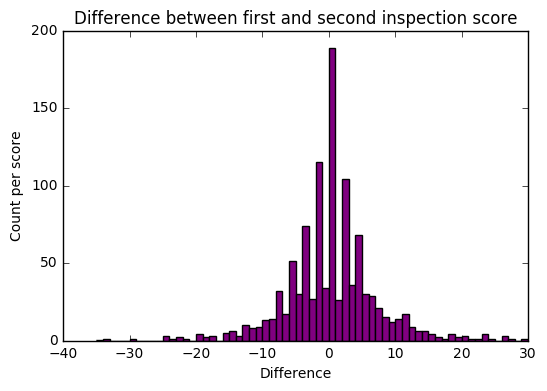

In [49]:
# Create histogram
score1, score2 = zip(*scores_pairs_by_business.score_pair)
diffs = [y - x for x, y in zip(score1, score2)]
bins = range(min(diffs)-1, max(diffs)+1)
hist = plt.subplot()
hist.set_title('Difference between first and second inspection score')
hist.set_ylabel('Count per score')
hist.set_xlabel('Difference')
hist = plt.hist(diffs, bins=bins, color = 'purple')
plt.show()

### So what do we see?:


If a restaurant's second score improves from the first, you would expect it's point on the scatterplot to be above the red reference line of slope 1 (because if the y point is higher than x, (x,y)'s slope from the origin >1). Based on the plot I generated, we see a somewhat even distribution of improvements and non-improvements. In fact, there see to be a few more non-improvements than improvements. Overall, most data clusters around the red line, meaning not much changed between inspection.

For the histrogram, recall that diff is (score2 - score1). thus, for a score improvement, the difference would be positive and fall on the right of the origin in the historgram (diff would be positive). We see that, as was reflected in the scatterpolot, there is roughly an even distribution of improvements and non-improvements, with the non-improvements having a bit of a tail towards negative. Overall, most businesses fell within a +- 5 change in their scores, meaning variance was not so high. 

# General Summary:

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that may restaurants have more than one inspection a year. In the future, we may want to roll some of the information about the inspections up to the business/restaurant level and join the inspection information with the business dataframe. For example, we could make maps of inspection scores for restaurants.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and we warrant further investigation. It also makes sense to learn more about the inspection process to help us understand the connections between scores from multiple inspections. 


@Source DS100 project I worked on!